<a href="https://colab.research.google.com/github/bomul0417/study/blob/main/NIDS_Project/KDD(Dos)_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [2]:
df_url = 'https://raw.githubusercontent.com/bomul0417/study/main/NIDS_Project/nsl-kdd/NSL_KDD_Train.csv'
df2_url = 'https://raw.githubusercontent.com/bomul0417/study/main/NIDS_Project/nsl-kdd/NSL_KDD_Test.csv'

In [3]:
columns = ['duration','protocol_type','service','flag','src_bytes',
    'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
    'logged_in','num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
    'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','label']


df = pd.read_csv(df_url, names = columns)

df2 = pd.read_csv(df2_url, names = columns)

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [5]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


# df + df2

In [6]:
newdf = pd.concat([df,df2], ignore_index=True)
newdf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
newdf.to_csv("New_NSL-KDD.csv", mode='w')

# 공격타입 지정

In [8]:
dfdos = newdf.replace(['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm'], 'dos')
dfr2l = dfdos.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 'r2l')
dfu2r = dfr2l.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 'u2r')
dfprobe = dfu2r.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'probe')
df_type = dfprobe
df_type

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,dos
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
df_type.value_counts('label')

label
normal    77054
dos       53385
probe     14077
r2l        3882
u2r         119
dtype: int64

'Dos', 'Normal' 값만 추출

In [10]:
condition = (df_type.label == 'normal') | (df_type.label == 'dos') | (df_type.label == 'probe') | (df_type.label == 'r2l') | (df_type.label == 'u2r')
df_dos = df_type[condition]
df_dos = df_dos.reset_index(drop=True)
df_dos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,dos
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
df_dos.value_counts('label')

label
normal    77054
dos       53385
probe     14077
r2l        3882
u2r         119
dtype: int64

In [12]:
for columns in df.columns:
  if df_dos[columns].dtypes == 'object':
    print(columns, '\n종류:', df_dos[columns].unique(), '\n개수:', df_dos[columns].nunique(), '\n')

protocol_type 
종류: ['tcp' 'udp' 'icmp'] 
개수: 3 

service 
종류: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 
개수: 70 

flag 
종류: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 
개수: 11 

label 
종류: ['normal' 'dos' 'r2l' 'probe' 'u2r'] 
개수: 5 



In [13]:
df_dos_obj = df_dos[['protocol_type','service','flag']]
df_dos_obj

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
148512,tcp,smtp,SF
148513,tcp,http,SF
148514,tcp,http,SF
148515,udp,domain_u,SF


# 컬럼 분류

In [14]:
newdos = df_dos.drop(columns=['label'])
newlabel = df_dos['label']

In [15]:
newdos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
148513,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


# LabelEncoding

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(newdos['protocol_type'])
protocol = le.transform(newdos['protocol_type'])

le.fit(newdos['service'])
service = le.transform(newdos['service'])

le.fit(newdos['flag'])
flag = le.transform(newdos['flag'])

newdos['protocol_type'] = protocol
newdos['service'] = service
newdos['flag'] = flag

In [32]:
xle = newdos
yle = newlabel
xle

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.000000000,0.050000000,0.000000000
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.100000000,0.050000000,0.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.000000000,0.000000000,0.030000000,0.040000000,0.030000000,0.010000000,0.000000000,0.010000000
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,54,9,794,333,0,0,0,0,...,100,141,0.720000000,0.060000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000
148513,0,1,24,9,317,938,0,0,0,0,...,197,255,1.000000000,0.000000000,0.010000000,0.010000000,0.010000000,0.000000000,0.000000000,0.000000000
148514,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000,0.070000000
148515,0,2,12,9,42,42,0,0,0,0,...,255,252,0.990000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000


In [33]:
from sklearn.model_selection import train_test_split

xle, xle_test, yle, yle_test = train_test_split(xle, yle, test_size=0.2, random_state=2022)

print(xle.shape, yle.shape)
print(xle_test.shape, yle_test.shape)

(118813, 41) (118813,)
(29704, 41) (29704,)


In [34]:
x=xle.head(1000)
x_test=xle_test.head(200)
y=yle.head(1000)
y_test=yle_test.head(200)

In [35]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
48809,5,1,20,9,2194619,0,0,0,0,0,...,133,31,0.230000000,0.020000000,0.230000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
62072,0,1,24,9,211,11379,0,0,0,0,...,26,255,1.000000000,0.000000000,0.040000000,0.060000000,0.000000000,0.000000000,0.000000000,0.000000000
5968,0,1,69,5,0,0,0,0,0,0,...,255,8,0.030000000,0.070000000,0.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000
105278,0,2,12,9,42,42,0,0,0,0,...,255,234,0.920000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
95442,0,1,24,9,229,1340,0,0,0,0,...,15,255,1.000000000,0.000000000,0.070000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110233,0,0,65,9,183,0,0,0,0,0,...,255,18,0.070000000,0.010000000,0.080000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
102446,0,0,14,9,8,0,0,0,0,0,...,1,95,1.000000000,0.000000000,1.000000000,0.510000000,0.000000000,0.000000000,0.000000000,0.000000000
110128,0,1,24,9,286,8188,0,0,0,1,...,80,237,1.000000000,0.000000000,0.010000000,0.030000000,0.010000000,0.000000000,0.000000000,0.000000000
95252,0,1,24,1,0,0,0,0,0,0,...,19,255,1.000000000,0.000000000,0.050000000,0.150000000,0.000000000,0.000000000,1.000000000,0.920000000


In [36]:
y

48809     normal
62072     normal
5968         dos
105278    normal
95442     normal
           ...  
110233    normal
102446     probe
110128    normal
95252     normal
46080        dos
Name: label, Length: 1000, dtype: object

In [38]:
yle_test.value_counts()

normal    15369
dos       10683
probe      2854
r2l         772
u2r          26
Name: label, dtype: int64

In [53]:
'''from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x, y)

ytest_preds = xgb.predict(x_test)

print('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))'''

"from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\nxgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)\nxgb.fit(x, y)\n\nytest_preds = xgb.predict(x_test)\n\nprint('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))"

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(xle, yle)

yle_preds = xgb.predict(xle_test)

print('Accuracy: %.2f' % accuracy_score(yle_test, yle_preds))

Accuracy: 1.00


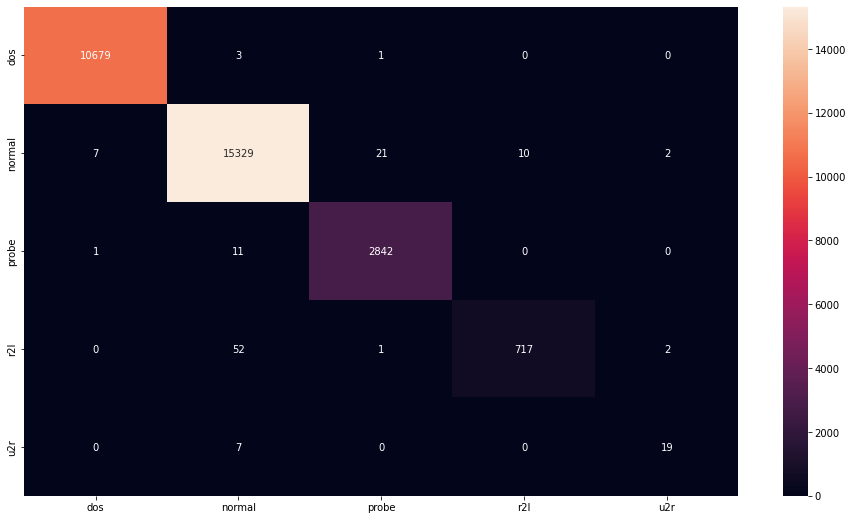

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yle_test, yle_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True,
    fmt='g', 
    xticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r'],
    yticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r']
)
plt.show()

# OneHot Encoding

In [16]:
dosoh = pd.get_dummies(newdos, columns=['protocol_type','service','flag'])
yoh = newlabel

dosoh

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148513,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148514,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
148515,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


정규화

In [17]:
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.9f}'.format #지수표현 X
#pd.reset_option('display.float_format') #지수표현 O

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dosoh)

xoh = pd.DataFrame(np_scaled, columns = dosoh.columns)

xoh

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000000,0.000000356,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
1,0.000000000,0.000000106,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
2,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
3,0.000000000,0.000000168,0.000006224,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
4,0.000000000,0.000000144,0.000000321,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.000000000,0.000000575,0.000000254,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
148513,0.000000000,0.000000230,0.000000716,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
148514,0.000000000,0.000039523,0.000006347,0.000000000,0.000000000,0.000000000,0.019801980,0.000000000,1.000000000,0.000133708,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000
148515,0.000000000,0.000000030,0.000000032,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000


In [18]:
from sklearn.model_selection import train_test_split

xoh, xoh_test, yoh, yoh_test = train_test_split(xoh, yoh, test_size=0.2, random_state=2022)

print(xoh.shape, yoh.shape)
print(xoh_test.shape, yoh_test.shape)

(118813, 122) (118813,)
(29704, 122) (29704,)


In [19]:
x=xoh.head(1000)
x_test=xoh_test.head(200)
y=yoh.head(1000)
y_test=yoh_test.head(200)

In [24]:
yoh_test.value_counts()

normal    15369
dos       10683
probe      2854
r2l         772
u2r          26
Name: label, dtype: int64

In [27]:
'''from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x, y)

ytest_preds = xgb.predict(x_test)

print('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))'''

"from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\nxgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)\nxgb.fit(x, y)\n\nytest_preds = xgb.predict(x_test)\n\nprint('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))"

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(xoh, yoh)

yoh_preds = xgb.predict(xoh_test)

print('Accuracy: %.2f' % accuracy_score(yoh_test, yoh_preds))

Accuracy: 1.00


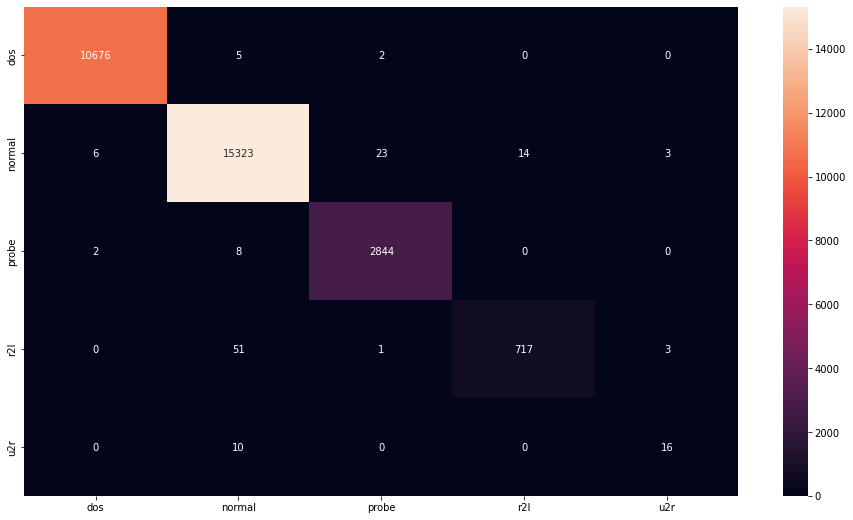

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yoh_test, yoh_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True, 
    fmt='g',
    xticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r'],
    yticklabels=['dos', 'normal', 'probe', 'r2l', 'u2r']
)
plt.show()